In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge 
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [155]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('M1_final.csv')
df

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,323,448,48,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,333,531,48,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,341,482,48,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,343,513,48,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,356,499,46,32,58,W,24,35,29.91,Fair / Windy,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,B6,N216JB,ORH,2,57,150,1370,1372,1427,39,38,96,N,6,0,30.18,Cloudy,20,32,19
28816,1,31,5,AA,N104NN,BOS,2,75,187,1390,1392,25,39,38,96,N,6,0,30.18,Cloudy,19,23,22
28817,1,31,5,AS,N581AS,SEA,283,392,2422,1125,1408,1337,39,38,96,N,6,0,30.18,Cloudy,19,23,21
28818,1,31,5,B6,N957JB,SJU,5,224,1598,1417,1422,261,39,38,96,N,6,0,30.18,Cloudy,19,23,13


In [156]:
# Cheking data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [157]:
# Change Dew Point from object to int64
df['Dew Point'] = df['Dew Point'].astype('int64')

In [158]:
# Cheking for null values
df.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

In [159]:
# deal with null values by dropping the 2 rows in the wind column.
df.dropna(inplace=True)
df.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 0
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

In [160]:
# Looking at the mean and max values it can be seen that there are anomalies as the max value of some columns is far above the mean. Like in DEP_DELAY column.
df.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000
mean,7.893955,16.020890,4.008953,6.373239,225.294399,1267.787494,830.970470,828.898987,910.886980,41.491047,30.422236,57.732806,12.368485,5.535707,30.092410,31.091956,28.431813,20.857207
std,4.991779,8.750448,1.985299,38.735195,119.483432,889.354031,299.381938,305.844666,345.370574,8.042493,12.313335,23.469480,6.258667,11.886780,0.296158,9.510317,8.263242,6.850197
min,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,-3.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,23.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,31.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1192.750000,47.000000,39.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,67.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


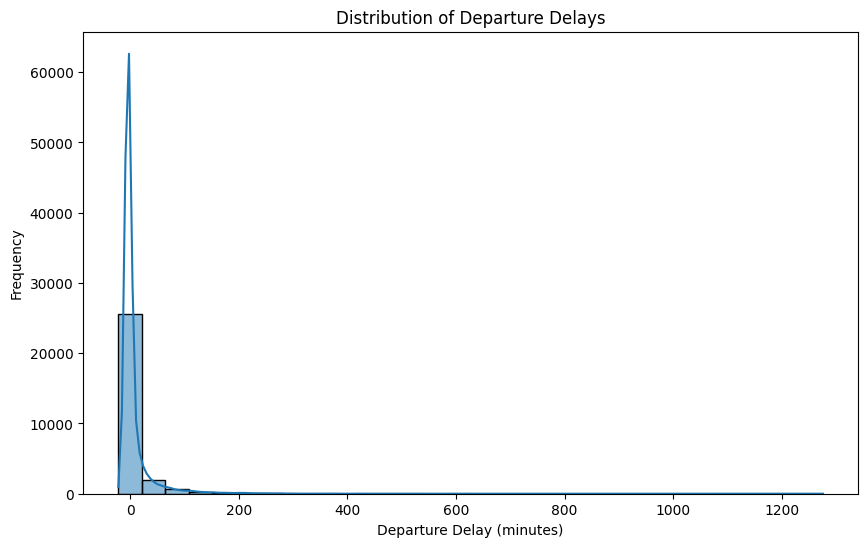

In [161]:
plt.figure(figsize=(10, 6))
sns.histplot(df['DEP_DELAY'], bins=30, kde=True)
plt.title('Distribution of Departure Delays')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Frequency')
plt.show()


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'Fair / Windy'),
  Text(1, 0, 'Fair'),
  Text(2, 0, 'Light Rain / Windy'),
  Text(3, 0, 'Partly Cloudy'),
  Text(4, 0, 'Mostly Cloudy'),
  Text(5, 0, 'Cloudy'),
  Text(6, 0, 'Light Rain'),
  Text(7, 0, 'Mostly Cloudy / Windy'),
  Text(8, 0, 'Partly Cloudy / Windy'),
  Text(9, 0, 'Light Snow / Windy'),
  Text(10, 0, 'Cloudy / Windy'),
  Text(11, 0, 'Light Drizzle'),
  Text(12, 0, 'Rain'),
  Text(13, 0, 'Heavy Rain'),
  Text(14, 0, 'Fog'),
  Text(15, 0, 'Wintry Mix'),
  Text(16, 0, 'Light Freezing Rain'),
  Text(17, 0, 'Light Snow'),
  Text(18, 0, 'Wintry Mix / Windy'),
  Text(19, 0, 'Fog / Windy'),
  Text(20, 0, 'Light Drizzle / Windy'),
  Text(21, 0, 'Rain / Windy'),
  Text(22, 0, 'Drizzle and Fog'),
  Text(23, 0, 'Snow'),
  Text(24, 0, 'Heavy Rain / Windy')])

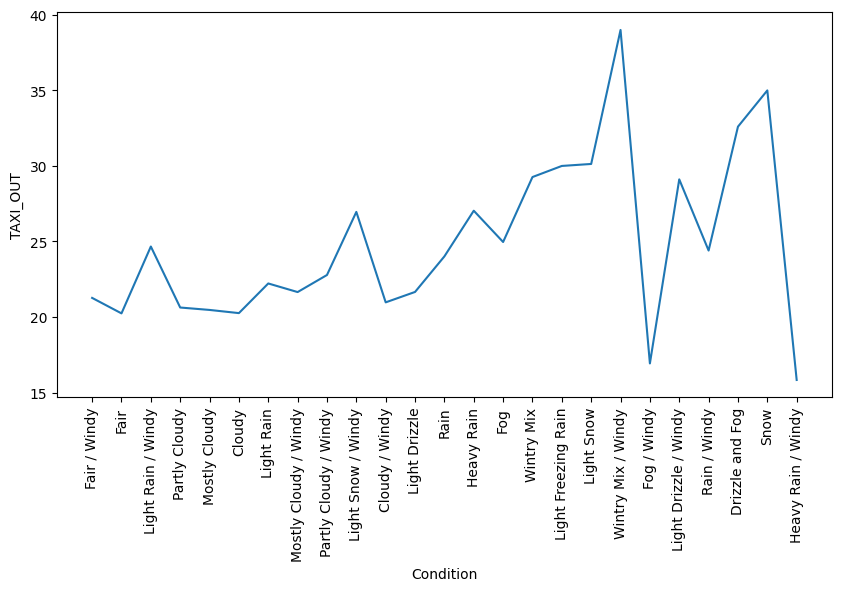

In [162]:
# cheking relationship between condition and taxi-out time
plt.figure(figsize=(10, 5))
sns.lineplot(x=df['Condition'], y=df['TAXI_OUT'], errorbar=None)
plt.xticks(rotation=90)

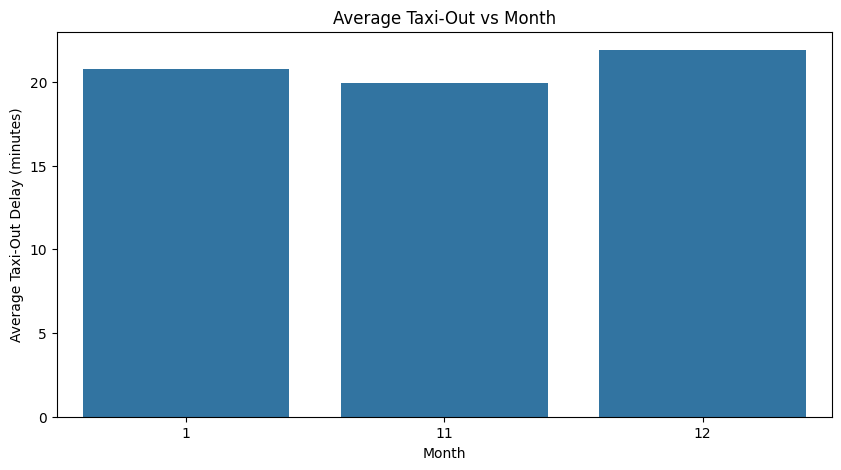

In [163]:
plt.figure(figsize=(10, 5))
sns.barplot(x='MONTH', y='TAXI_OUT', data=df, errorbar=None)
plt.title('Average Taxi-Out vs Month')
plt.xlabel('Month')
plt.ylabel('Average Taxi-Out Delay (minutes)')
plt.show()

Text(0.5, 0, 'Minutes')

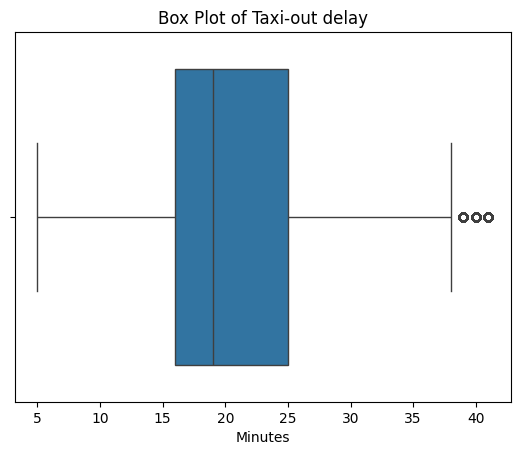

In [164]:
sns.boxplot(x=df['TAXI_OUT'])
plt.title('Box Plot of Taxi-out delay')    
plt.xlabel('Minutes')

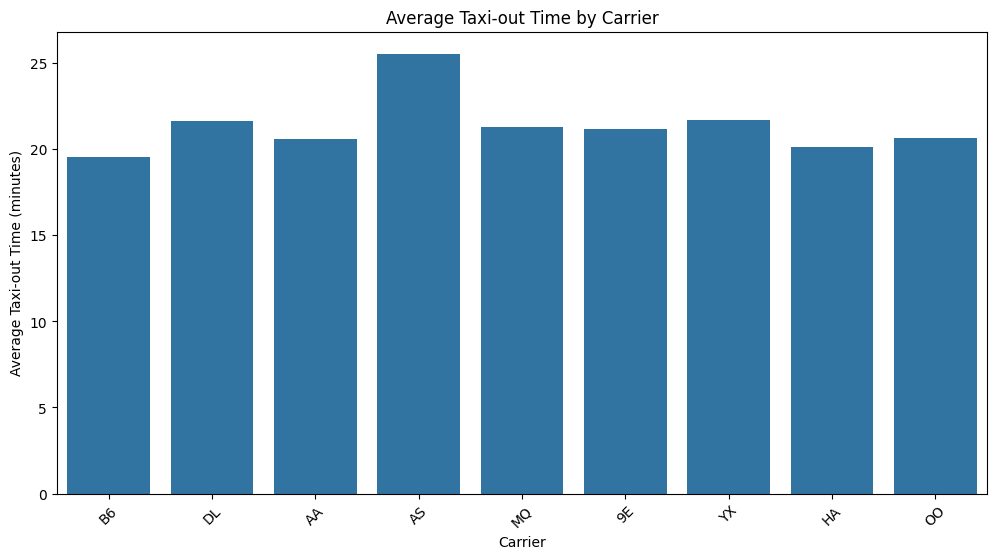

In [165]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['OP_UNIQUE_CARRIER'], y=df['TAXI_OUT'], estimator=pd.Series.mean, errorbar=None)
plt.title('Average Taxi-out Time by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Average Taxi-out Time (minutes)')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 0, 'Destination')

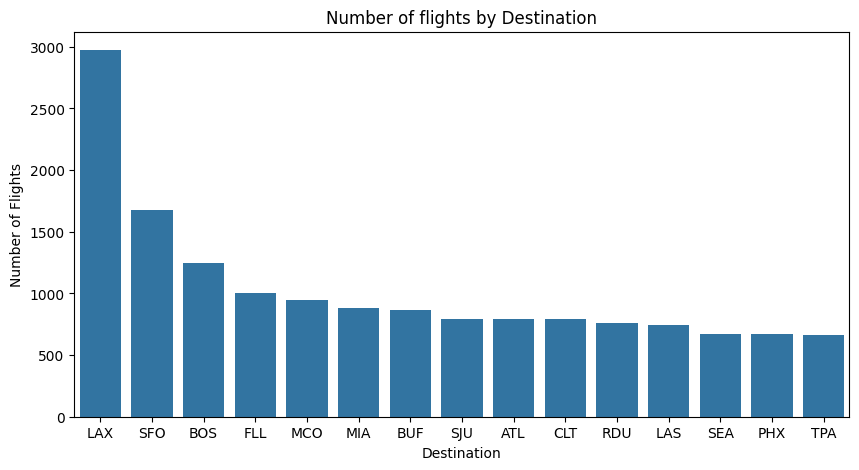

In [166]:

plt.figure(figsize=(10, 5))
sns.barplot(data=df['DEST'].value_counts().iloc[:15])
plt.title("Number of flights by Destination")
plt.ylabel('Number of Flights')
plt.xlabel('Destination')

Text(0, 0.5, 'Taxi Out Delay (minutes)')

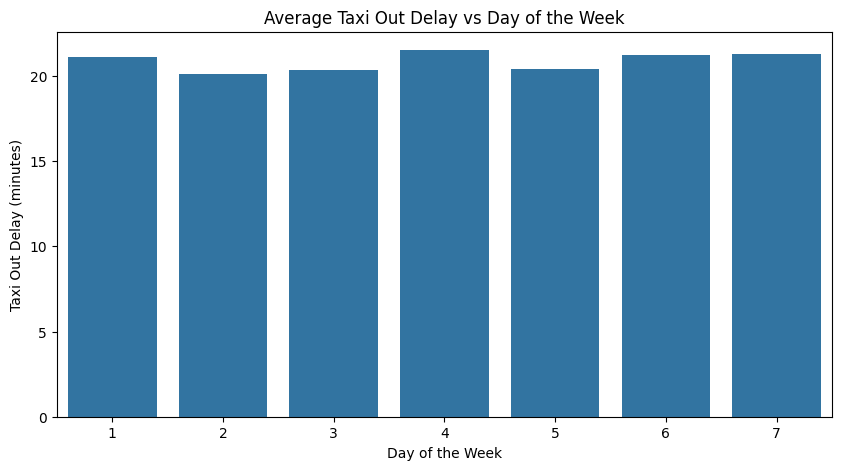

In [167]:
# Looking at the relationship between taxi-out delay and day of the week
plt.figure(figsize=(10, 5))
sns.barplot(x=df['DAY_OF_WEEK'], y=df['TAXI_OUT'], estimator=pd.Series.mean, errorbar=None)
plt.title('Average Taxi Out Delay vs Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Taxi Out Delay (minutes)') 

<Axes: xlabel='sch_dep', ylabel='TAXI_OUT'>

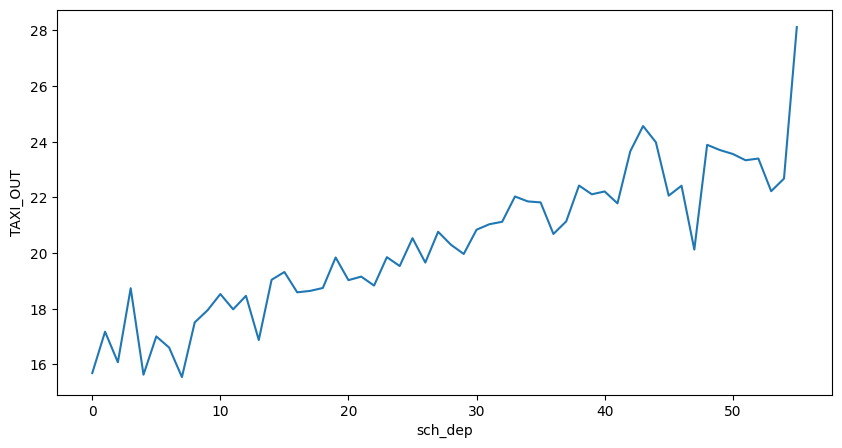

In [168]:
# cheking relationship between shceduled departure time and taxi-out time
plt.figure(figsize=(10, 5))
sns.lineplot(x=df['sch_dep'], y=df['TAXI_OUT'], errorbar=None)

<Axes: xlabel='Wind Speed', ylabel='DEP_DELAY'>

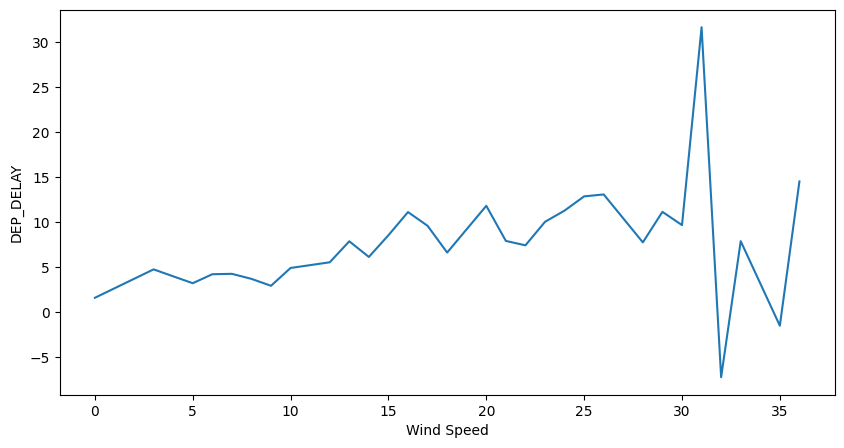

In [169]:
# checking how wind speed relates to departure delay
plt.figure(figsize=(10, 5))
sns.lineplot(x=df['Wind Speed'], y=df['DEP_DELAY'], errorbar=None)

<Axes: xlabel='DISTANCE', ylabel='CRS_ELAPSED_TIME'>

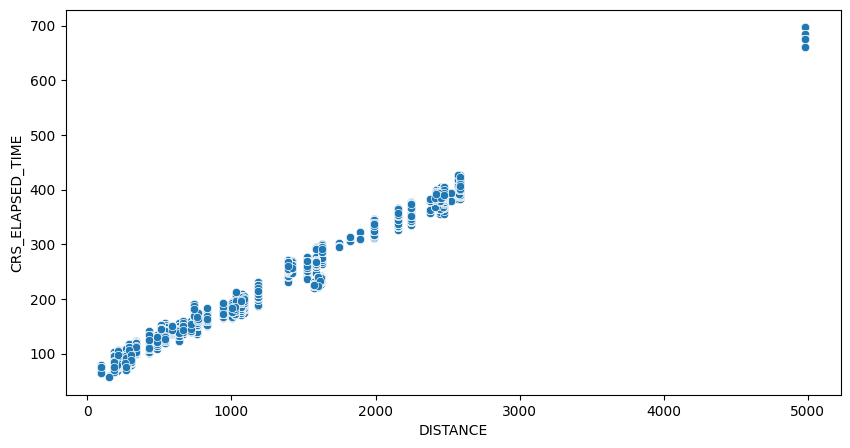

In [170]:
# Looking at correlation between distance and elapsed time
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['DISTANCE'], y=df['CRS_ELAPSED_TIME'])

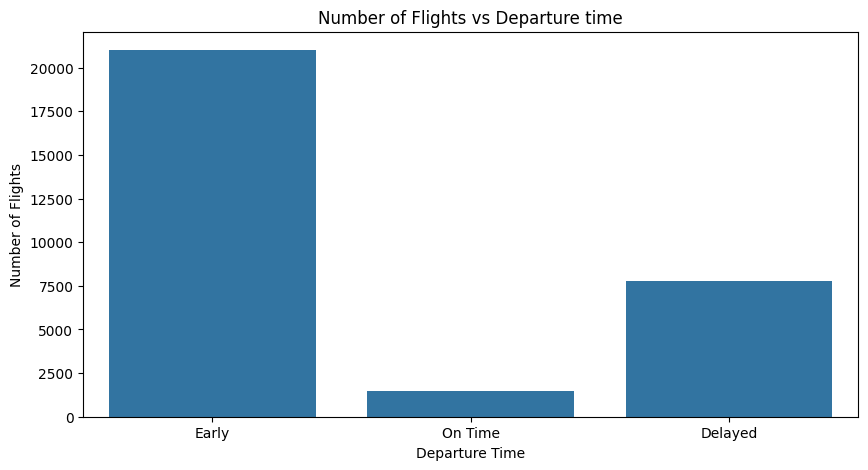

In [171]:
# Looking at how many flights were early, on time or delayed in total
early_flights = df[df['DEP_DELAY'] <= 0]
on_time_flights = df[(df['DEP_DELAY'] == 0)]
delayed_flights = df[df['DEP_DELAY'] > 0]

early_count = len(early_flights)
on_time_count = len(on_time_flights)
delayed_count = len(delayed_flights)

plt.figure(figsize=(10, 5))
sns.barplot(x=['Early', 'On Time', 'Delayed'], y=[early_count, on_time_count, delayed_count])
plt.title('Number of Flights vs Departure time')
plt.xlabel('Departure Time')
plt.ylabel('Number of Flights')
plt.show()

In [172]:
#check correlation between values. To do this we'll use label encoding for the categorical columns
df = df.drop("TAIL_NUM", axis=1).copy()
df_labelencode = df.copy()
df_labelencode['DEST'] = LE().fit_transform(df_labelencode['DEST'])
df_labelencode['OP_UNIQUE_CARRIER'] = LE().fit_transform(df_labelencode['OP_UNIQUE_CARRIER'])
df_labelencode['Wind'] = LE().fit_transform(df_labelencode['Wind'].astype('str'))
df_labelencode['Condition'] = LE().fit_transform(df_labelencode['Condition'])
df_labelencode

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,3,10,-1,124,636,324,323,448,48,34,58,15,25,38,29.86,4,9,17,14
1,11,1,5,3,28,-7,371,2475,340,333,531,48,34,58,15,25,38,29.86,4,9,17,15
2,11,1,5,3,20,40,181,1069,301,341,482,48,34,58,15,25,38,29.86,4,9,17,22
3,11,1,5,3,30,-2,168,944,345,343,513,48,34,58,15,25,38,29.86,4,9,17,12
4,11,1,5,4,1,-4,139,760,360,356,499,46,32,58,15,24,35,29.91,4,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,3,38,2,57,150,1370,1372,1427,39,38,96,4,6,0,30.18,0,20,32,19
28816,1,31,5,1,4,2,75,187,1390,1392,25,39,38,96,4,6,0,30.18,0,19,23,22
28817,1,31,5,2,55,283,392,2422,1125,1408,1337,39,38,96,4,6,0,30.18,0,19,23,21
28818,1,31,5,3,58,5,224,1598,1417,1422,261,39,38,96,4,6,0,30.18,0,19,23,13


<Axes: >

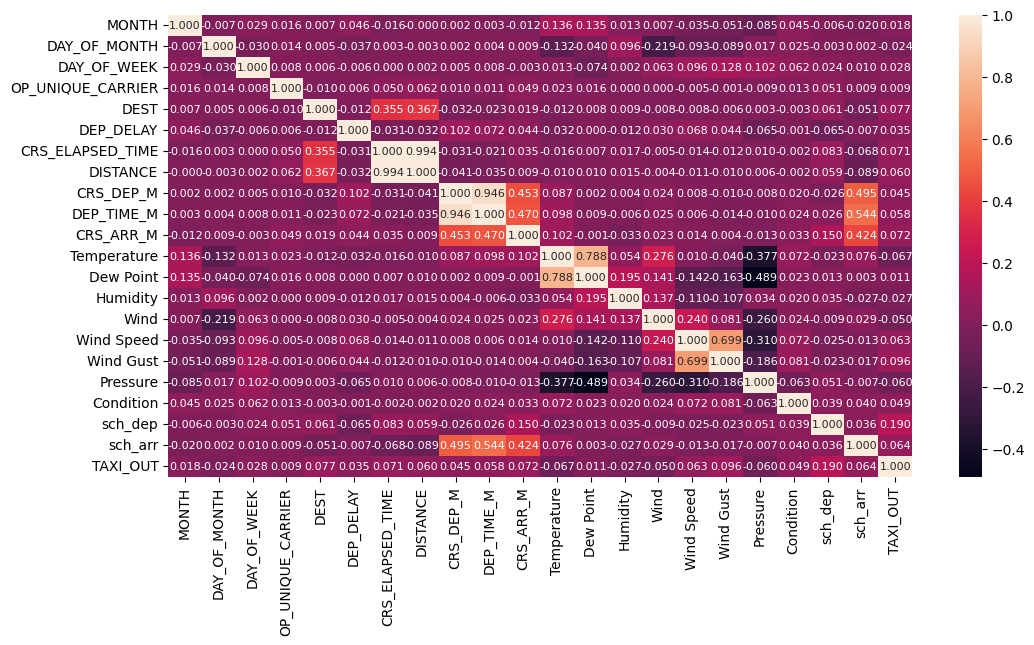

In [173]:
# Simple correlation heatmap without the tail number column. This is showing very little correleation of Taxi-out with any other variable in the dataset. 
plt.figure(figsize=(12, 6))
sns.heatmap(df_labelencode.corr(), annot=True, fmt=".3f", annot_kws={'size':  8})

In [174]:
# Setting up the training and test data
X = df_labelencode.drop('TAXI_OUT', axis=1)
Y = df_labelencode['TAXI_OUT']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr
0,11,1,5,3,10,-1,124,636,324,323,448,48,34,58,15,25,38,29.86,4,9,17
1,11,1,5,3,28,-7,371,2475,340,333,531,48,34,58,15,25,38,29.86,4,9,17
2,11,1,5,3,20,40,181,1069,301,341,482,48,34,58,15,25,38,29.86,4,9,17
3,11,1,5,3,30,-2,168,944,345,343,513,48,34,58,15,25,38,29.86,4,9,17
4,11,1,5,4,1,-4,139,760,360,356,499,46,32,58,15,24,35,29.91,4,9,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,3,38,2,57,150,1370,1372,1427,39,38,96,4,6,0,30.18,0,20,32
28816,1,31,5,1,4,2,75,187,1390,1392,25,39,38,96,4,6,0,30.18,0,19,23
28817,1,31,5,2,55,283,392,2422,1125,1408,1337,39,38,96,4,6,0,30.18,0,19,23
28818,1,31,5,3,58,5,224,1598,1417,1422,261,39,38,96,4,6,0,30.18,0,19,23


In [175]:
# Linear Regression
le = LinearRegression().fit(X_train, Y_train)
Y_pred1 = le.predict(X_test)
score1 = le.score(X_test, Y_test)
print(f'score: {score1}')
mse1 = mean_squared_error(Y_test, Y_pred1)
rmse1 = round(mse1**0.5, 2)
print(f"mean square error: {mse1}")
print(f"root mean square error: {rmse1}")

score: 0.09283481857106546
mean square error: 41.917929570240865
root mean square error: 6.47


In [176]:
# Ridge Regression
rd = Ridge(alpha=1.0).fit(X_train, Y_train)
Y_pred2 = rd.predict(X_test)
score2 = rd.score(X_test, Y_test)
print(f'score: {score2}')
mse2 = mean_squared_error(Y_test, Y_pred2)
rmse2 = round(mse2**0.5, 2)
print(f"mean square error: {mse2}")
print(f"root mean square error: {rmse2}")

score: 0.09283431002663689
mean square error: 41.91795306886049
root mean square error: 6.47


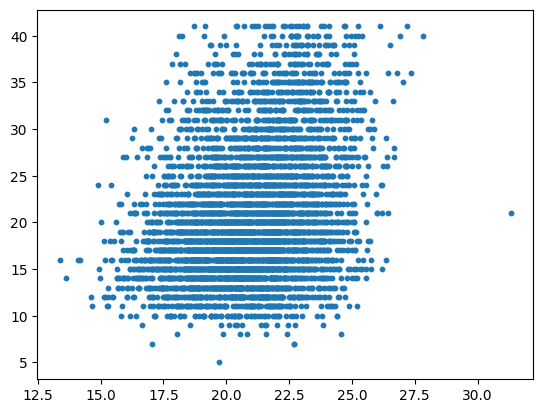

In [181]:
# scatter plot of linear regression test and predicted values
plt.scatter(x=Y_pred1, y=Y_test, s=10)
plt.show()